<a href="https://colab.research.google.com/github/comaserious/deep_learning_practice/blob/main/%EA%B3%A0%EA%B0%9D%EA%B5%B0%EC%A7%91_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import datetime
import math
import matplotlib.pyplot as plt

In [3]:
retail_df = pd.read_excel('/content/Online Retail.xlsx')
retail_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [4]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
retail_df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [7]:
retail_df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [10]:
retail_df = retail_df[retail_df['Quantity']>0]
retail_df = retail_df[retail_df['UnitPrice']>0]
retail_df = retail_df.dropna()
retail_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [11]:
retail_df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [12]:
len(retail_df['Country'].unique())

37

In [14]:
retail_df['Country'].value_counts()

,count
Country,
United Kingdom,354321
Germany,9040
France,8341
EIRE,7236
Spain,2484
Netherlands,2359
Belgium,2031
Switzerland,1841
Portugal,1462


In [15]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [16]:
retail_df['SalesAmount']=retail_df['Quantity'] * retail_df['UnitPrice']
retail_df['CustomerID']= retail_df['CustomerID'].astype('int')
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SalesAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [17]:
retail_df.groupby('CustomerID')['SalesAmount'].sum().sort_values(ascending=False)

,SalesAmount
CustomerID,
14646,280206.02
18102,259657.30
17450,194550.79
16446,168472.50
14911,143825.06
...,...
16878,13.30
17956,12.75
16454,6.90


In [18]:
aggregation ={
    'SalesAmount' : 'sum', # 금액
    'InvoiceNo' : 'count', # 몇번 주문?
    'InvoiceDate' : 'max' # 가장 최신데이터
}

cust_df = retail_df.groupby('CustomerID').agg(aggregation)
cust_df

,SalesAmount,InvoiceNo,InvoiceDate
CustomerID,,,
12346,77183.60,1,2011-01-18 10:01:00
12347,4310.00,182,2011-12-07 15:52:00
12348,1797.24,31,2011-09-25 13:13:00
12349,1757.55,73,2011-11-21 09:51:00
12350,334.40,17,2011-02-02 16:01:00
...,...,...,...
18280,180.60,10,2011-03-07 09:52:00
18281,80.82,7,2011-06-12 10:53:00
18282,178.05,12,2011-12-02 11:43:00


In [19]:
import datetime as dt

cust_df['InvoiceDate'] = dt.datetime(2011,12,10)- cust_df['InvoiceDate']
cust_df

,SalesAmount,InvoiceNo,InvoiceDate
CustomerID,,,
12346,77183.60,1,325 days 13:59:00
12347,4310.00,182,2 days 08:08:00
12348,1797.24,31,75 days 10:47:00
12349,1757.55,73,18 days 14:09:00
12350,334.40,17,310 days 07:59:00
...,...,...,...
18280,180.60,10,277 days 14:08:00
18281,80.82,7,180 days 13:07:00
18282,178.05,12,7 days 12:17:00


In [20]:
cust_df['InvoiceDate'].dt.days

,InvoiceDate
CustomerID,
12346,325
12347,2
12348,75
12349,18
12350,310
...,...
18280,277
18281,180
18282,7


In [22]:
cust_df['InvoiceDate'] = cust_df['InvoiceDate'].dt.days

AttributeError: Can only use .dt accessor with datetimelike values

In [23]:
cust_df

,SalesAmount,InvoiceNo,InvoiceDate
CustomerID,,,
12346,77183.60,1,325
12347,4310.00,182,2
12348,1797.24,31,75
12349,1757.55,73,18
12350,334.40,17,310
...,...,...,...
18280,180.60,10,277
18281,80.82,7,180
18282,178.05,12,7


In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score ,silhouette_samples

In [25]:
scaled_data = StandardScaler().fit_transform(cust_df)
scaled_data

array([[ 8.35866818e+00, -3.96577702e-01,  2.32938811e+00],
       [ 2.50966264e-01,  3.94648958e-01, -9.00588115e-01],
       [-2.85960063e-02, -2.65435162e-01, -1.70593488e-01],
       ...,
       [-2.08742313e-01, -3.48492104e-01, -8.50588483e-01],
       [ 4.51854273e-03,  2.90384290e+00, -8.90588188e-01],
       [-2.41412739e-02, -9.49498596e-02, -5.00591059e-01]])

In [26]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(scaled_data)
kmeans.labels_

array([0, 1, 1, ..., 1, 1, 1], dtype=int32)

In [27]:
cust_df['cluster']=kmeans.labels_
cust_df

,SalesAmount,InvoiceNo,InvoiceDate,cluster
CustomerID,,,,
12346,77183.60,1,325,0
12347,4310.00,182,2,1
12348,1797.24,31,75,1
12349,1757.55,73,18,1
12350,334.40,17,310,0
...,...,...,...,...
18280,180.60,10,277,0
18281,80.82,7,180,0
18282,178.05,12,7,1


In [28]:
silhouette_score(scaled_data,kmeans.labels_)

0.6018678448358709

<ipython-input-35-d280732722e0>:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(


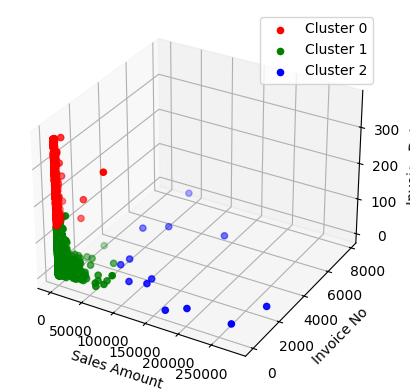

In [35]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 3D 플롯 생성
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 색상 설정
colors = ['r', 'g', 'b']
for i, color in enumerate(colors):
    cluster_data = cust_df[cust_df['cluster'] == i]

    # scatter 플롯
    ax.scatter(
        xs=cluster_data['SalesAmount'],
        ys=cluster_data['InvoiceNo'],
        zs=cluster_data['InvoiceDate'],
        c=color,
        cmap='viridis',
        label=f'Cluster {i}'
    )

# 축 라벨 설정
ax.set_xlabel('Sales Amount')
ax.set_ylabel('Invoice No')
ax.set_zlabel('Invoice Date')

# 범례 및 표시
ax.legend()
plt.show()

